# **Cardiovascular diseases**

 A type of disease that affects the heart or blood vessels.

The risk of certain heart diseases may be increased by smoking, high blood pressure, high cholesterol, unhealthy diet, lack of exercise, and obesity.

Coronary artery disease,

arrhythmia,

heart valve disease and

heart failure are the four most common types of heart disease.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/heart.csv')

**Age:** age of the patient [years]

**Sex:** sex of the patient [M: Male, F: Female]

**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS**:fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

Oldpeak: **bold text** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, D **bold text**own: downsloping]

**HeartDisease:** output class [1: heart disease, 0: Normal]

# **EXPLORING THE DATASET**

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

EXPLORATORY DATA ANALYSIS

using label encoder to tranform non-numeric labels into numeric labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])
df['ChestPainType'] = LE.fit_transform(df['ChestPainType'])
df['RestingECG'] = LE.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = LE.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = LE.fit_transform(df['ST_Slope'])

In [ ]:
# if you specify axis=1 you will be removing columns.
X = df.drop('HeartDisease',axis=1)
y = y = df['HeartDisease']
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**BOOSTING -- ADABOOST(ADAPTIVE BOOSTING)**

AdaBoost uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones.

**ADABOOST CLASSIFIER PARAMETERS:**

**base_estimator:** This parameter is used to signify the type of base learners we can implement or the type of weak learner we want to use.
By default, the base estimator is DecisionTreeClassifier(max_depth=1).

**n_estimators:** The number of base estimators or weak learners we want to use in our dataset. By default, the n_estimator is 50.

**learning_rate:** This parameter is provided to shrink the contribution of each classifier. By default, it is provided a value of 1.




In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(random_state=96,base_estimator=DecisionTreeClassifier(max_depth=2),
                            n_estimators=1000,learning_rate=0.05)
ada.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.05, n_estimators=1000, random_state=96)

In [ ]:
y_pred = ada.predict(X_test)

In [ ]:
print(ada.score(X_test,y_test)*100)

85.86956521739131


[[63 14]
 [12 95]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



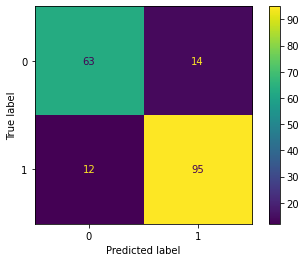

In [ ]:
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(ada,X_test,y_test)
plt.show()